In [3]:
# Load datasets
customers = pd.read_csv('../data/Customers.csv')
products = pd.read_csv('../data/Products.csv')
transactions = pd.read_csv('../data/Transactions.csv')

# Merge datasets to prepare the data
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')

# Resolve duplicate columns
data = data.rename(columns={'Price_y': 'Price'}).drop(columns=['Price_x'])

# Prepare the customer_profiles DataFrame
customer_profiles = data.groupby('CustomerID')[['Price', 'Quantity', 'TotalValue']].sum()

              Price  Quantity  TotalValue
CustomerID                               
C0001       1391.67        12     3354.52
C0002        835.68        10     1862.74
C0003        782.83        14     2725.38
C0004       1925.09        23     5354.88
C0005        874.81         7     2034.24
Optimal number of clusters: 2


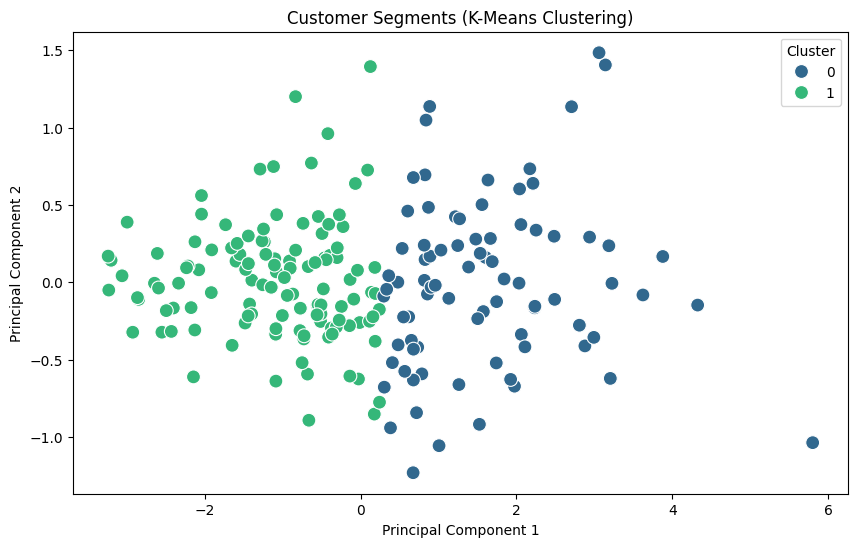

Davies-Bouldin Index for optimal k (2): 0.7300543835859905


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use the customer_profiles DataFrame
# Ensure customer_profiles is defined
print(customer_profiles.head())

# Normalize the data
scaler = StandardScaler()
customer_profiles_normalized = scaler.fit_transform(customer_profiles)

# Step 2: Apply K-Means Clustering
# Experiment with k values
k_values = range(2, 11)
db_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_profiles_normalized)
    
    # Calculate DB Index
    db_index = davies_bouldin_score(customer_profiles_normalized, labels)
    db_indices.append(db_index)

# Find the best k (lowest DB Index)
optimal_k = k_values[np.argmin(db_indices)]
print(f"Optimal number of clusters: {optimal_k}")

# Refit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(customer_profiles_normalized)

# Step 3: Visualize Clusters
# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_profiles_normalized)

# Create a DataFrame with cluster labels
clustered_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
clustered_data['Cluster'] = labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 4: Save Clustering Report
# Calculate DB Index for the optimal k
final_db_index = davies_bouldin_score(customer_profiles_normalized, labels)
print(f"Davies-Bouldin Index for optimal k ({optimal_k}): {final_db_index}")

# Save clustering results and metrics
clustered_data['CustomerID'] = customer_profiles.index
clustered_data.to_csv('../outputs/FirstName_LastName_Clustering.csv', index=False)

# Save clustering report as PDF (manually describe findings)

In [5]:
print(customer_profiles.head())

              Price  Quantity  TotalValue
CustomerID                               
C0001       1391.67        12     3354.52
C0002        835.68        10     1862.74
C0003        782.83        14     2725.38
C0004       1925.09        23     5354.88
C0005        874.81         7     2034.24


In [6]:
print(customer_profiles.head())


              Price  Quantity  TotalValue
CustomerID                               
C0001       1391.67        12     3354.52
C0002        835.68        10     1862.74
C0003        782.83        14     2725.38
C0004       1925.09        23     5354.88
C0005        874.81         7     2034.24
